# Importing Library


In [1]:
import tkinter as tk
from tkinter import messagebox, scrolledtext, Button, Label, Entry
from wordcloud import WordCloud, STOPWORDS
from rake_nltk import Rake
import matplotlib.pyplot as plt
import nltk
from heapq import nlargest
import string
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aman0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aman0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
with open("sample.txt","r", encoding="utf8") as f:
    text=f.read()
    

In [3]:
print(text)

In the heart of a quaint village, cradled by rolling hills and a serpentine river, there existed a legend that wove its magic through the fabric of time. It was a tale of the Whispering Woods, an ancient forest said to hold the echoes of centuries past, where the trees themselves were said to harbor secrets long forgotten.

Among the villagers, none held the legend as closely to her heart as a young girl named Elara. Her eyes sparkled like the night sky, and her spirit burned with an insatiable curiosity. Often, she could be found perched at the forest's edge, her ears straining to catch the faintest murmur, as her grandmother, a repository of age-old wisdom, shared tales of the enchantment that lay within those ancient boughs.

One brisk autumn morning, when the leaves crunched underfoot like crisp parchment, Elara resolved to venture deeper into the Whispering Woods than she ever had before. Her steps were deliberate, each one carrying her further into what felt like a sacred realm. 

In [4]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tk

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install rake-nltk

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aman0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aman0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


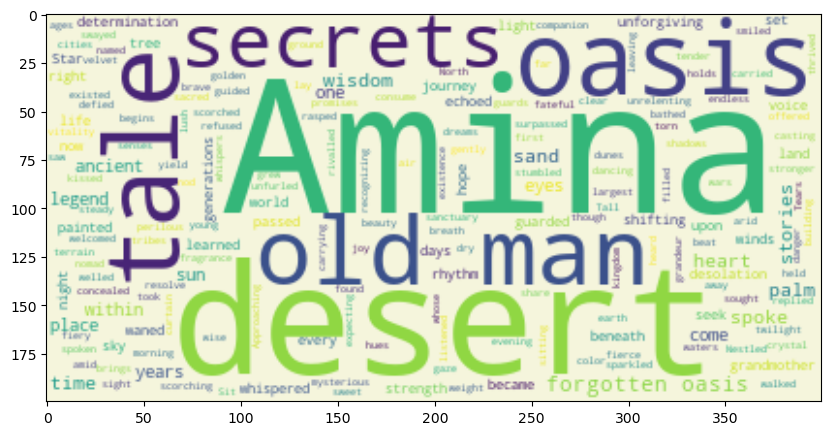

In [7]:

# Initialize NLTK
nltk.download('stopwords')
nltk.download('punkt')

def generate_word_cloud():
    text = text_input.get("1.0",'end-1c')
    WC=WordCloud(stopwords=STOPWORDS, background_color="beige").generate(text)

    plt.figure(figsize=(10,10))
    plt.imshow(WC,interpolation='bilinear')
    plt.axis("on")
    plt.show()

def extract_keywords():
    text = text_input.get("1.0",'end-1c')
    rk = Rake()

    rk.extract_keywords_from_text(text)
    extract_keyword = rk.get_ranked_phrases()
    keywords_output.delete(1.0, tk.END)
    keywords_output.insert(tk.END, "\n".join(extract_keyword))

def summarize_text():
    text = text_input.get("1.0",'end-1c')

    nopuch = [char for char in text if char not in string.punctuation]
    nopuch = "".join(nopuch)

    process_text = [word for word in nopuch.split() if word.lower() not in nltk.corpus.stopwords.words('english')]

    word_freq = {}
    for word in process_text:
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] = word_freq[word] + 1

    max_freq = max(word_freq.values())

    for word in word_freq.keys():
        word_freq[word] = (word_freq[word] / max_freq)

    sent_list = nltk.sent_tokenize(text)

    sent_score = {}
    for sent in sent_list:
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_freq.keys():
                if sent not in sent_score.keys():
                    sent_score[sent] = word_freq[word]
                else:
                    sent_score[sent] = sent_score[sent] + word_freq[word]

    summary_sent = nlargest(10, sent_score, key=sent_score.get)
    summary = " ".join(summary_sent)
    summary_output.delete(1.0, tk.END)
    summary_output.insert(tk.END, summary)

# Create main window
root = tk.Tk()
root.title("Text Analysis GUI")

# Text Input
Label(root, text="Enter Text:").pack()
text_input = scrolledtext.ScrolledText(root, wrap=tk.WORD, width=100, height=10)
text_input.pack()

# Buttons
Button(root, text="Generate Word Cloud", command=generate_word_cloud).pack()
Button(root, text="Extract Keywords", command=extract_keywords).pack()
Button(root, text="Summarize Text", command=summarize_text).pack()

# Output
Label(root, text="Keywords:").pack()
keywords_output = scrolledtext.ScrolledText(root, wrap=tk.WORD, width=100, height=10)
keywords_output.pack()

Label(root, text="Summary:").pack()
summary_output = scrolledtext.ScrolledText(root, wrap=tk.WORD, width=100, height=10)
summary_output.pack()

# Start GUI
root.mainloop()
